👨‍🎓 Integrantes:

Alice C. M. Assis - RM 566233

Leonardo S. Souza - RM 563928

Lucas B. Francelino - RM 561409

Pedro L. T. Silva - RM 561644

Vitor A. Bezerra - RM 563001

GitHub: 

https://github.com/Al1ce4-AI/fiap_fase3_cap14

🔍 Importação de bibliotecas especializadas para análise de dados agrícolas

Nesta célula, são importadas bibliotecas essenciais para análise de dados e pré-processamento e modelagem (sklearn). Essas ferramentas fornecem funcionalidades fundamentais para manipulação de datasets, transformação de variáveis e construção de modelos preditivos eficientes.

In [141]:
# 🔍 Importação de bibliotecas especializadas para análise de dados agrícolas

# ------------------------------
# 📊 Manipulação e Visualização
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ------------------------------
# 🔄 Pré-processamento
# ------------------------------
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

# ------------------------------
# 🤖 Modelagem (Classificadores)
# ------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV

# ------------------------------
# 🧪 Avaliação de Desempenho
# ------------------------------
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score
)

# ------------------------------
# ⚙️ Utilitários
# ------------------------------
import random
import time
import os

📂 Definição do caminho de acesso aos dados da lavoura

Aqui, o caminho do arquivo .csv contendo os dados agrícolas é definido em uma variável. Essa prática torna o código mais organizado e permite reutilizar facilmente o caminho do arquivo ao longo do notebook, facilitando ajustes e reaproveitamento do script.

In [142]:
#📂 Definição do caminho de acesso aos dados da lavoura

csv_path = "COTAxCHUVA.csv"

📥 Carregamento do dataset para estrutura tabular do pandas

Esta etapa carrega os dados do arquivo CSV para um DataFrame, a estrutura de dados mais comum do pandas. Isso permite o uso de diversas ferramentas para exploração, limpeza e análise estatística dos dados referentes a culturas agrícolas como milho e cana-de-açúcar.

In [143]:
#📥 Carregamento do dataset para estrutura tabular do pandas

df = pd.read_csv(csv_path)

In [144]:
limite_inundacao = 200

# Lista das colunas de cota diária
colunas_cota = [f'Cota{str(i).zfill(2)}' for i in range(1, 32)]

# Criar coluna 'Inundacao': 1 se qualquer dia exceder o limite, 0 caso contrário
df['Inundacao'] = (df[colunas_cota] > limite_inundacao).any(axis=1).astype(int)

🔎 Inspeção inicial do dataset para compreensão de variáveis e formato

Visualizar as primeiras linhas do DataFrame com df.head() serve como um ponto de partida para compreender a estrutura do dataset, verificar nomes de colunas, tipos de variáveis (como nitrogênio, pH, umidade etc.) e identificar possíveis anomalias logo no início. 

In [145]:
#🔎 Inspeção inicial do dataset para compreensão de variáveis e formato

# 4.1) Exibir primeiras linhas do dataset
df.head(20)

,NivelConsistencia,Mes,MediaCota,Cota01,Cota02,Cota03,Cota04,Cota05,Cota06,Cota07,...,Chuva23,Chuva24,Chuva25,Chuva26,Chuva27,Chuva28,Chuva29,Chuva30,Chuva31,Inundacao
0,1,7/1/1956,119,122,121,121,120,121,121,120,...,0.0,0.0,0.0,0.6,0.0,3.8,0.6,0.0,0.0,0
1,1,8/1/1956,114,117,123,120,118,117,116,115,...,0.0,0.0,0.0,0.1,0.0,9.2,23.7,0.0,0.0,0
2,1,9/1/1956,109,108,108,107,107,107,106,106,...,0.0,0.0,0.0,0.0,0.0,0.0,18.6,4.9,NaN,0
3,1,10/1/1956,107,131,113,105,104,102,101,100,...,0.0,2.9,0.0,12.4,0.0,11.0,1.8,0.0,25.7,0
4,1,11/1/1956,130,122,107,103,153,116,123,110,...,28.4,1.1,34.7,0.0,15.7,1.2,2.4,0.0,NaN,1
5,1,12/1/1956,173,117,114,112,120,116,120,119,...,10.5,42.1,71.2,42.7,39.1,1.4,0.0,0.0,0.0,1
6,1,1/1/1957,192,231,187,160,161,170,153,148,...,1.2,0.0,0.0,0.0,0.0,9.5,6.0,21.6,2.6,1
7,1,2/1/1957,197,159,158,174,166,163,187,176,...,4.8,0.4,29.4,24.7,10.3,20.2,NaN,NaN,NaN,1
8,1,3/1/1957,188,204,183,180,175,170,170,164,...,31.7,3.3,0.0,9.6,0.0,0.0,1.4,3.9,0.0,1
9,1,4/1/1957,207,166,198,190,175,302,346,386,...,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,NaN,1


🧾 Diagnóstico estrutural do DataFrame e tipagem dos dados com df.info()

Utiliza-se o método df.info() para obter um resumo técnico da estrutura do dataset. Essa função retorna:

- Número total de entradas (linhas);
- Número e o nome das colunas;
- Número de valores não nulos em cada coluna;
- Tipo de dado de cada coluna (int64, float64, object, etc.);
- Uso aproximado de memória.

Essa análise é essencial para validar se:

Todas as colunas foram corretamente interpretadas pelo pandas (ex: float ao invés de object), se existem colunas com valores ausentes (non-null < total) e se há necessidade de otimizar tipos de dados para uso eficiente de memória, principalmente em grandes volumes de dados. Essa inspeção ajuda a antecipar problemas e tomar decisões sobre pré-processamento antes da análise ou modelagem.

🔍 Complementos úteis (comentados):
Além do df.info(), o código menciona outras funções que aprofundam a compreensão sobre a estrutura do conjunto de dados.

Essas informações ajudam a entender melhor como os dados estão organizados e se há problemas que precisam ser corrigidos, como colunas com dados ausentes ou tipos de dados incorretos. Por exemplo, é importante garantir que colunas com números estejam em tipos numéricos adequados (int ou float), e que colunas com nomes de culturas estejam como object (texto). Com esse diagnóstico inicial, podemos planejar os próximos passos da análise com mais segurança.

In [146]:
#🧾 Diagnóstico estrutural do DataFrame e tipagem dos dados com df.info() e Complementos úteis (comentados):

df.info()

#df.shape → Retorna (2200, 8), indicando que o dataset possui 2200 amostras (linhas) e 8 atributos (colunas).

#df.columns → Lista os nomes das colunas, revelando que os atributos medem nutrientes (N, P, K), variáveis ambientais (temperatura, umidade, pH, precipitação) e a variável alvo 
# label (tipo de cultura agrícola).

#df.dtypes → Retorna os tipos de dados:
#int64 para nutrientes (N, P, K)
#float64 para variáveis contínuas (temperature, humidity, ph, rainfall)
#object para a label, pois é uma variável categórica (string)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 67 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NivelConsistencia  18 non-null     int64  
 1   Mes                18 non-null     object 
 2   MediaCota          18 non-null     int64  
 3   Cota01             18 non-null     int64  
 4   Cota02             18 non-null     int64  
 5   Cota03             18 non-null     int64  
 6   Cota04             18 non-null     int64  
 7   Cota05             18 non-null     int64  
 8   Cota06             18 non-null     int64  
 9   Cota07             18 non-null     int64  
 10  Cota08             18 non-null     int64  
 11  Cota09             18 non-null     int64  
 12  Cota10             18 non-null     int64  
 13  Cota11             18 non-null     int64  
 14  Cota12             18 non-null     int64  
 15  Cota13             18 non-null     int64  
 16  Cota14             18 non-nu

🚨 Detecção de dados faltantes para avaliação da necessidade de imputação

Esta etapa verifica a presença de valores nulos no dataset utilizando df.isnull().sum(). Embora a função df.info() também identifique dados faltantes, sua visualização pode ser menos intuitiva. A existência de valores ausentes pode prejudicar tanto a análise exploratória quanto o desempenho dos modelos preditivos. Por isso, é fundamental decidir uma estratégia adequada, como imputação, exclusão de linhas ou colunas, ou o uso de modelos que suportem dados nulos.

In [147]:
#🚨 Detecção de dados faltantes para avaliar necessidade de imputação

print(df.isnull().sum()) 

NivelConsistencia    0
Mes                  0
MediaCota            0
Cota01               0
Cota02               0
                    ..
Chuva28              0
Chuva29              1
Chuva30              1
Chuva31              7
Inundacao            0
Length: 67, dtype: int64


In [148]:
df = df.ffill(axis=1)

In [149]:
print(df.isnull().sum()) 

NivelConsistencia    0
Mes                  0
MediaCota            0
Cota01               0
Cota02               0
                    ..
Chuva28              0
Chuva29              0
Chuva30              0
Chuva31              0
Inundacao            0
Length: 67, dtype: int64


🔁 Detecção de entradas redundantes no dataset

Esta célula tem como objetivo identificar registros duplicados, ou seja, linhas que aparecem mais de uma vez com os mesmos valores em todas as colunas. Isso é feito por meio do método df.duplicated(), que retorna uma série booleana indicando True para as linhas duplicadas.

In [150]:
#🔁 Detecção de entradas redundantes no dataset
duplicates= df.duplicated().sum()
print(f"Total de duplicados: {duplicates}")

Total de duplicados: 0


📊 Detecção e tratamento de valores extremos com IQR 

Esta célula tem o objetivo de identificar e tratar outliers (valores fora do padrão esperado) na coluna 'temperature', utilizando o método do Intervalo Interquartil (IQR), tratar outliers é essencial para evitar distorções em modelos de regressão, classificadores e estatísticas descritivas, especialmente em modelos sensíveis a valores extremos, como KNN e regressão linear.

In [151]:
#📊 Detecção e tratamento de valores extremos com IQR (exemplo)

## Identificando os outliers usando o método do Intervalo Interquartil (IQR)
#Q1 = df['temperature'].quantile(0.25)  # Primeiro quartil
#Q3 = df['temperature'].quantile(0.75)  # Terceiro quartil
#IQR = Q3 - Q1  # Intervalo interquartil

## Definir limites para outliers
#outlier_lower = Q1 - 1.5 * IQR  # Limite inferior
#outlier_upper = Q3 + 1.5 * IQR  # Limite superior

## Calcular a mediana da temperatura
#median_temperature = df['temperature'].median()

## Substituir os outliers pela mediana
#df['temperature'] = df['temperature'].apply(lambda x: median_temperature if x < outlier_lower or x > outlier_upper else x)

📊 Estatísticas descritivas para análise quantitativa preliminar

Com df.describe(), obtemos medidas estatísticas como média, mediana, desvio padrão e quartis para variáveis numéricas. Isso fornece uma noção do comportamento e da dispersão dos dados, ajudando a identificar outliers e padrões.

In [152]:
#📊 Estatísticas descritivas para análise quantitativa preliminar

df.describe()

,NivelConsistencia,Mes,MediaCota,Cota01,Cota02,Cota03,Cota04,Cota05,Cota06,Cota07,...,Chuva23,Chuva24,Chuva25,Chuva26,Chuva27,Chuva28,Chuva29,Chuva30,Chuva31,Inundacao
count,18,18,18,18,18,18,18,18,18,18,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18
unique,1,18,16,15,18,18,15,16,17,17,...,9.0,9.0,5.0,10.0,4.0,9.0,11.0,8.0,7.0,2
top,1,7/1/1956,119,122,121,121,120,170,123,110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
freq,18,1,2,2,1,1,3,2,2,2,...,10.0,9.0,14.0,9.0,15.0,10.0,8.0,11.0,12.0,10


🎯 Quantificação das classes da variável alvo

A função df['label'].value_counts() permite entender quantas amostras existem para cada cultura agrícola no dataset. Isso ajuda a verificar se as classes estão balanceadas ou se há desbalanceamento, o que afeta diretamente o desempenho de modelos classificadores.

In [153]:
#🎯 Quantificação das classes da variável alvo

df['Inundacao'].value_counts()

Inundacao
0    10
1     8
Name: count, dtype: int64

🎯 Separando os dados em variáveis preditoras e variável target 

Nesta etapa, fazemos a divisão dos dados em:

X: variáveis preditoras (features), que contêm as informações do solo e clima — como nitrogênio (N), fósforo (P), potássio (K), temperatura, umidade, pH e precipitação. Essas serão as entradas para os modelos.
y: variável target (rótulo), que indica o tipo de cultura agrícola (label) que queremos prever.

Essa separação é fundamental para o treinamento dos modelos de machine learning, pois permite que eles aprendam a relação entre as condições do ambiente (X) e o tipo de cultura ideal (y). Assim, podemos avaliar a capacidade preditiva dos algoritmos para recomendar o produto agrícola adequado às condições fornecidas.

In [168]:
# Lista de variáveis preditoras
colunas_cota = [f'Cota{str(i).zfill(2)}' for i in range(1, 32)]
colunas_chuva = [f'Chuva{str(i).zfill(2)}' for i in range(1, 32)]

variaveis_preditoras = ['Mes', 'MediaCota'] + colunas_cota + ['TotalChuva'] + colunas_chuva

# Separar X e y
X = df[variaveis_preditoras]
y = df['Inundacao']

print (X)

          Mes MediaCota Cota01 Cota02 Cota03 Cota04 Cota05 Cota06 Cota07  \
0    7/1/1956       119    122    121    121    120    121    121    120   
1    8/1/1956       114    117    123    120    118    117    116    115   
2    9/1/1956       109    108    108    107    107    107    106    106   
3   10/1/1956       107    131    113    105    104    102    101    100   
4   11/1/1956       130    122    107    103    153    116    123    110   
5   12/1/1956       173    117    114    112    120    116    120    119   
6    1/1/1957       192    231    187    160    161    170    153    148   
7    2/1/1957       197    159    158    174    166    163    187    176   
8    3/1/1957       188    204    183    180    175    170    170    164   
9    4/1/1957       207    166    198    190    175    302    346    386   
10   5/1/1957       156    161    160    158    157    156    155    161   
11   6/1/1957       139    144    144    144    144    143    143    143   
12   7/1/195

🎯 Conversão da variável alvo categórica para formato numérico

Algoritmos de machine learning geralmente exigem que a variável alvo (label) esteja em formato numérico. Esta etapa utiliza o LabelEncoder, e em casos mais complexos o One-Hot Enconding (como exemplificado abaixo),  para transformar categorias textuais (como o tipo de cultura) em números, preservando a associação entre as classes e preparando os dados para o treinamento supervisionado.

In [155]:
#🎯 Conversão da variável alvo categórica para formato numérico

# Definindo X e y
y = df['Inundacao']  # variável alvo
X = df.drop(columns=['Inundacao'])  # todas as outras variáveis, incluindo 'Data'

# Aplicando One-Hot Encoding na coluna 'Data'
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# É necessário transformar em DataFrame e manter o índice
data_encoded = ohe.fit_transform(X[['Mes']])  # [['Data']] garante 2D
data_encoded_df = pd.DataFrame(
    data_encoded,
    columns=ohe.get_feature_names_out(['Mes']),
    index=X.index
)

# Remove a coluna original 'Data' e adiciona as colunas codificadas
X = X.drop(columns=['Mes'])
X = pd.concat([X, data_encoded_df], axis=1)

✂️ Separação dos dados em conjuntos de treino e teste com estratificação

Aqui os dados são divididos em conjuntos de treinamento e teste com base em uma proporção definida (80/20). O parâmetro stratify=y garante que a distribuição das classes da variável alvo seja preservada em ambas as amostras, o que é fundamental para garantir avaliações mais realistas e imparciais dos modelos.

In [156]:
#✂️ Separação dos dados em conjuntos de treino e teste com estratificação

colunas_excluir_teste = ['MediaCota', 'Cota01, Cota02, Cota03, Cota04'] # Excluir colunas específicas do conjunto de teste

y = df['Inundacao'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

📏 Escalonamento das variáveis numéricas para melhorar desempenho dos modelos

A normalização dos dados, feita com MinMaxScaler, ajusta as variáveis para uma mesma escala (geralmente de 0 a 1). Isso é crucial para algoritmos que são sensíveis à magnitude dos dados, como KNN e SVM, garantindo que nenhuma variável domine a modelagem apenas por ter valores maiores.

In [157]:
#📏 Escalonamento das variáveis numéricas para melhorar desempenho dos modelos

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Garante que y é 1D
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Garante que os valores são inteiros
y_train = y_train.astype(int)
y_test = y_test.astype(int)

🔄 Configurar validação cruzada estratificada com StratifiedKFold 

Aqui, utilizamos o StratifiedKFold para criar 5 divisões (folds) dos dados que preservam a proporção original das classes em cada parte. Configuramos o embaralhamento dos dados (shuffle=True) para garantir aleatoriedade na divisão e definimos uma semente fixa (random_state=42) para resultados reproduzíveis, essa configuração assegura que o modelo seja avaliado de forma equilibrada e consistente em diferentes subconjuntos do conjunto de dados.

In [158]:
#🔄 Configurar validação cruzada estratificada com StratifiedKFold 

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

⚙️ Instanciação de modelos de aprendizado supervisionado para classificação

Nesta célula, criamos uma lista de 20 modelos de machine learning para classificação, com diferentes algoritmos e hiperparâmetros aleatórios. Os modelos incluem Regressão Logística, Árvore de Decisão, Random Forest, Gradient Boosting, SVM, KNN e Naive Bayes.

Para garantir diversidade, cada modelo recebe um nome único baseado em seus hiperparâmetros, evitando duplicatas. Essa variedade permite testar diferentes configurações e comparar seu desempenho na tarefa de prever a cultura agrícola a partir de características do solo e clima.

In [159]:
#⚙️ Instanciação de modelos de aprendizado supervisionado para classificação

# Funções auxiliares para gerar variações aleatórias
random_state = lambda: random.randint(1, 100)
n_estimators = lambda: random.choice([50, 100, 150, 200])
k_neighbors = lambda: random.choice([3, 5, 7, 10, 15])
max_depth = lambda: random.choice([None, 3, 5, 10])
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
hidden_layer_sizes = lambda: random.choice([(50,), (100,), (50, 50), (100, 50)])

modelos = []
nomes_gerados = set()

while len(modelos) < 20:
    modelo_tipo = random.choice([
        'lr', 'dt', 'rf', 'gb', 'svm', 'knn', 'nb',
        'et', 'ada', 'lda', 'qda', 'mlp', 'bag', 'cal'
    ])
    
    if modelo_tipo == 'lr':
        nome = f'LogReg {random_state()}'
        if nome not in nomes_gerados:
            modelo = LogisticRegression(max_iter=1000, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'dt':
        depth = max_depth()
        nome = f'DecTree d{depth}'
        if nome not in nomes_gerados:
            modelo = DecisionTreeClassifier(max_depth=depth, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'rf':
        n = n_estimators()
        nome = f'RandForest {n}'
        if nome not in nomes_gerados:
            modelo = RandomForestClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'gb':
        n = n_estimators()
        nome = f'GradBoost {n}'
        if nome not in nomes_gerados:
            modelo = GradientBoostingClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'et':
        n = n_estimators()
        nome = f'ExtraTrees {n}'
        if nome not in nomes_gerados:
            modelo = ExtraTreesClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'ada':
        n = n_estimators()
        nome = f'AdaBoost {n}'
        if nome not in nomes_gerados:
            modelo = AdaBoostClassifier(n_estimators=n, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)
    
    elif modelo_tipo == 'svm':
        kernel = random.choice(kernels)
        nome = f'SVM {kernel}'
        if nome not in nomes_gerados:
            modelo = SVC(kernel=kernel, probability=True, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'knn':
        k = k_neighbors()
        nome = f'KNN {k}'
        if nome not in nomes_gerados:
            modelo = KNeighborsClassifier(n_neighbors=k)
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'nb':
        nome = f'Naive Bayes {random_state()}'
        if nome not in nomes_gerados:
            modelo = GaussianNB()
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'lda':
        nome = 'LDA'
        if nome not in nomes_gerados:
            modelo = LinearDiscriminantAnalysis()
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'qda':
        nome = 'QDA'
        if nome not in nomes_gerados:
            modelo = QuadraticDiscriminantAnalysis()
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'mlp':
        hls = hidden_layer_sizes()
        nome = f'MLP {hls}'
        if nome not in nomes_gerados:
            modelo = MLPClassifier(hidden_layer_sizes=hls, max_iter=1000, random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'bag':
        base_depth = max_depth()
        nome = f'Bagging DT d{base_depth}'
        if nome not in nomes_gerados:
            base_est = DecisionTreeClassifier(max_depth=base_depth, random_state=random_state())
            modelo = BaggingClassifier(estimator=base_est, n_estimators=n_estimators(), random_state=random_state())
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

    elif modelo_tipo == 'cal':
        # CalibratedClassifierCV precisa de base, usar SVM linear
        nome = 'Calibrated SVM linear'
        if nome not in nomes_gerados:
            base_svm = SVC(kernel='linear', probability=False, random_state=random_state())
            modelo = CalibratedClassifierCV(base_svm)
            modelos.append((nome, modelo))
            nomes_gerados.add(nome)

📊 Treinamento dos modelos, validação cruzada e avaliação preditiva

Nesta célula, executa-se o ciclo completo de aprendizado de máquina para cada modelo instanciado: 

- ⏱️ *Treinamento* com os dados de treino (`X_train`, `y_train`);
- 🔁 *Predição* e avaliação no conjunto de teste (`X_test`, `y_test`);
- 📈 *Coleta de métricas preditivas* como Acurácia, Precisão, Recall, F1-Score e ROC AUC;
- ⏳ *Registro do tempo de treinamento* de cada modelo;
- 📦 Armazenamento dos modelos treinados e de suas predições para uso posterior.

Essa abordagem permite comparar o desempenho e a eficiência de múltiplos algoritmos sob as mesmas condições experimentais.

In [160]:
#📊 Treinamento dos modelos, validação cruzada e avaliação preditiva


# Avaliação dos modelos
resultados = []
tempos = []
parametros = []
modelos_treinados = {}
y_preds = {}
resultados = []

for nome, modelo in modelos:
    print(f"Treinando: {nome}")
    inicio = time.time()

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    fim = time.time()
    duracao = fim - inicio

    try:
        y_proba = modelo.predict_proba(X_test)
        if len(set(y)) == 2:
            auc = roc_auc_score(y_test, y_proba[:, 1])
        else:
            auc = roc_auc_score(y_test, y_proba, multi_class='ovr')
    except:
        auc = None

    resultados.append({
        'Modelo': nome,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'ROC AUC': auc
    })

    modelos_treinados[nome] = modelo
    y_preds[nome] = y_pred
    tempos.append({'Modelo': nome, 'Tempo Treinamento (s)': round(duracao, 3)})

Treinando: GradBoost 50
Treinando: KNN 10
Treinando: SVM poly
Treinando: QDA
Treinando: Calibrated SVM linear
Treinando: LDA
Treinando: ExtraTrees 100
Treinando: AdaBoost 150
Treinando: AdaBoost 50
Treinando: GradBoost 100
Treinando: DecTree d3
Treinando: AdaBoost 200
Treinando: Bagging DT d3


c:\Users\alice\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\alice\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Treinando: AdaBoost 100
Treinando: MLP (50, 50)
Treinando: KNN 5
Treinando: ExtraTrees 200
Treinando: DecTree d10
Treinando: ExtraTrees 50
Treinando: Naive Bayes 15


📈 Organização e exibição dos resultados de desempenho dos modelos

Esta célula organiza os resultados obtidos durante a avaliação dos modelos em um DataFrame, ordenando-os pela métrica F1 Score para destacar os modelos com melhor desempenho geral. Além disso, registra o tempo de treinamento de cada modelo em um segundo DataFrame.

In [161]:
#📈 Organização e exibição dos resultados de desempenho dos modelos

atual_resultados = pd.DataFrame(resultados).sort_values(by='F1 Score', ascending=False)
df_resultados = atual_resultados
df_tempos = pd.DataFrame(tempos)

#📋 Comparação visual entre modelos com base em métricas de classificação

Esta célula define e executa a função `exibir_metricas`, responsável por gerar visualizações comparativas entre os modelos de machine learning avaliados. As visualizações incluem:

- *Gráfico de barras do F1 Score*: mostra quais modelos obtiveram melhor desempenho equilibrado entre precisão e recall.
- *Mapa de calor das métricas*: apresenta uma visão geral das principais métricas (Accuracy, Precision, Recall, F1 Score e ROC AUC) para todos os modelos.
- *Gráfico de tempo de treinamento*: compara a eficiência temporal de cada modelo, indicando o tempo necessário para treinar cada um deles.

Essas visualizações ajudam a identificar os modelos mais eficazes e eficientes para o conjunto de dados agrícola analisado.

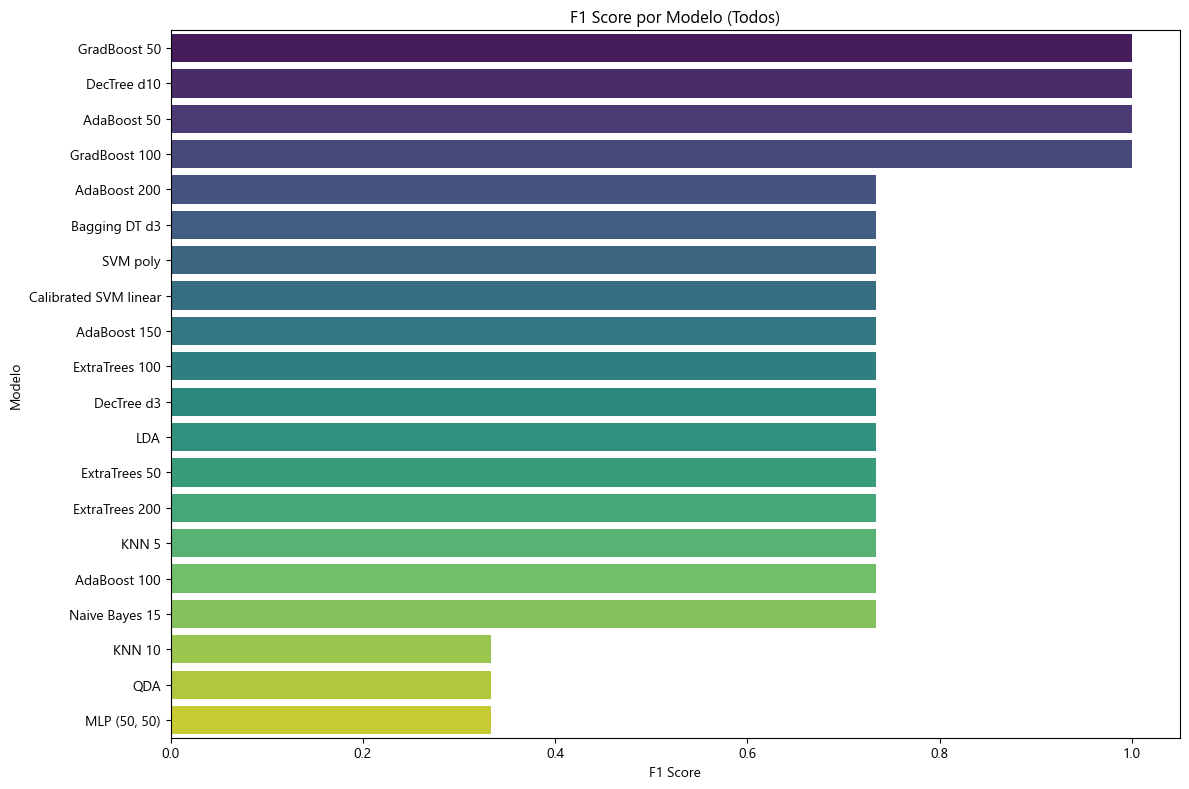

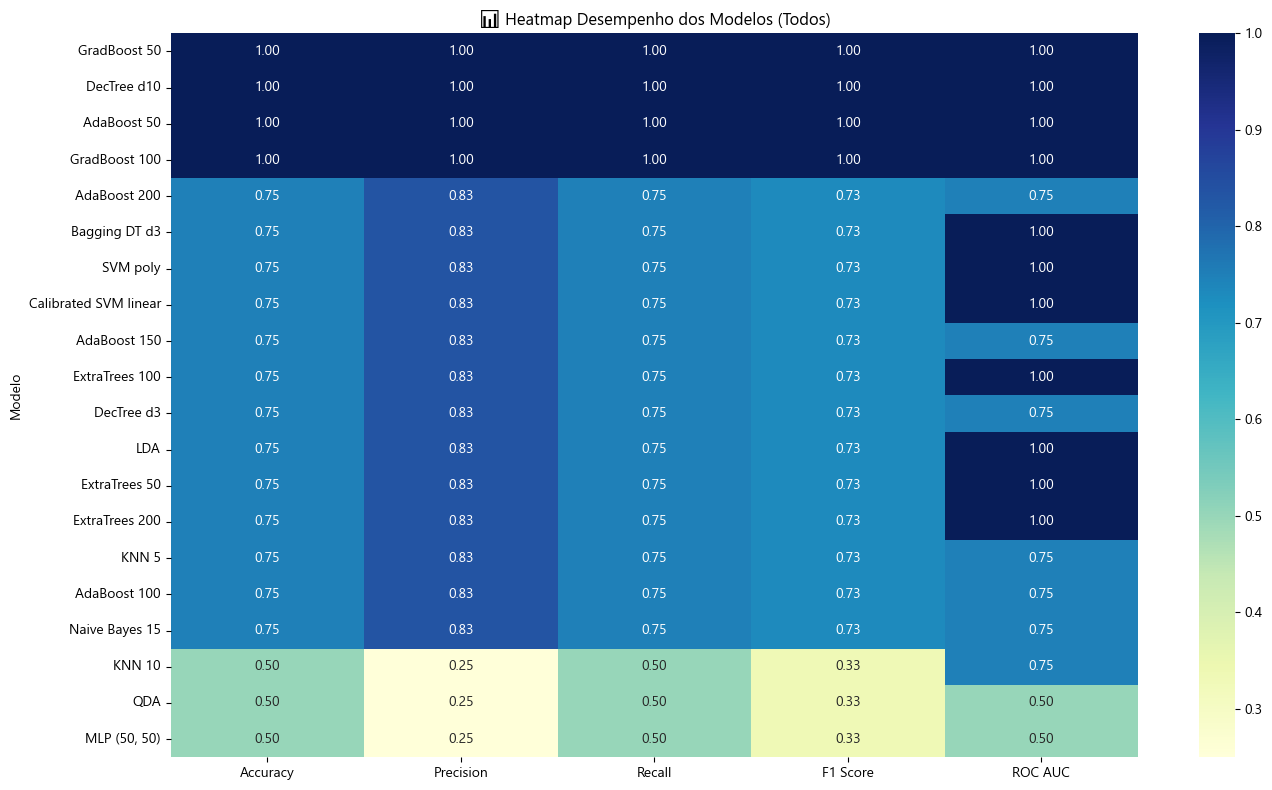

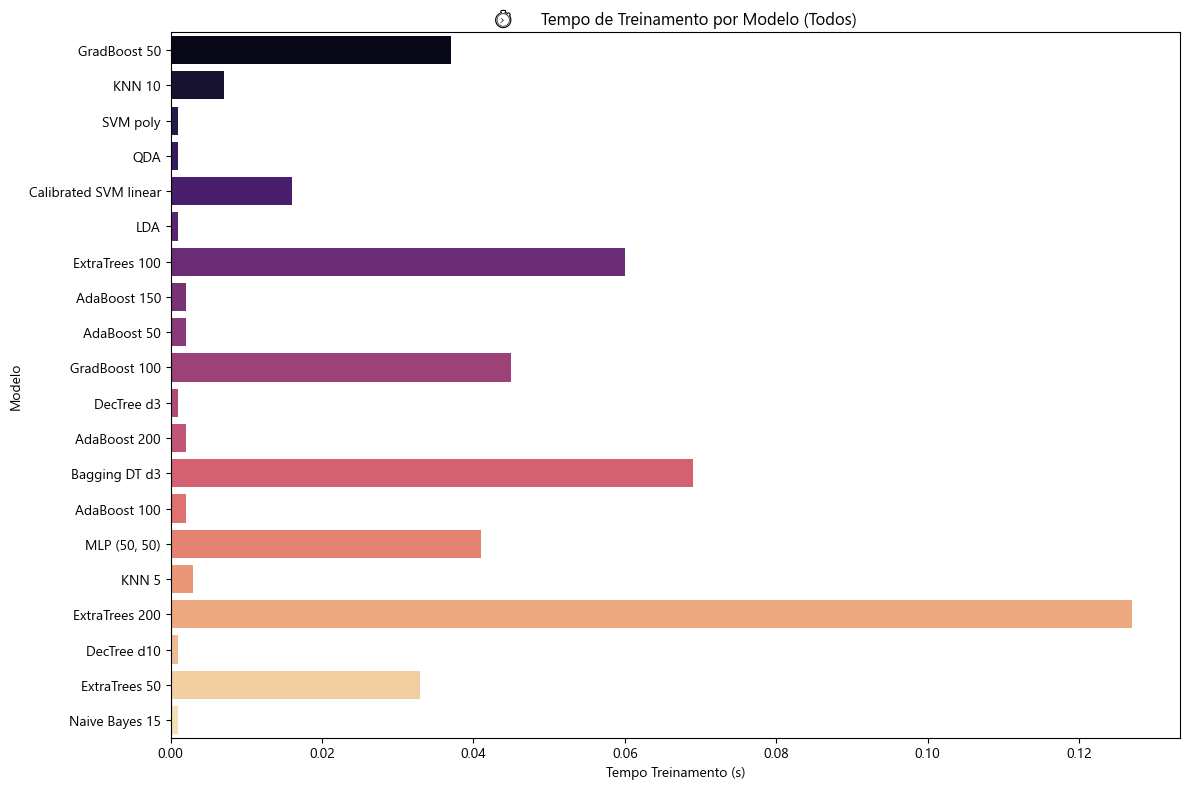

In [162]:
#📋 Comparação visual entre modelos com base em métricas de classificação

def exibir_metricas(df_resultados, df_tempos):
    # Barplot - F1 Score
    plt.figure(figsize=(12, max(6, len(df_resultados) * 0.4)))
    sns.barplot(data=df_resultados, x='F1 Score', y='Modelo', hue='Modelo', palette='viridis', legend=False)
    plt.title('F1 Score por Modelo (Todos)')
    plt.tight_layout()
    plt.show()

    # Heatmap - Todas as métricas
    plt.figure(figsize=(14, max(6, len(df_resultados) * 0.4)))
    heatmap_data = df_resultados.drop(columns='Modelo').set_index(df_resultados['Modelo']).astype(float)
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('📊 Heatmap Desempenho dos Modelos (Todos)')
    plt.rcParams['font.family'] = 'Segoe UI Emoji'
    plt.tight_layout()
    plt.show()

    # Tempo de treinamento
    plt.figure(figsize=(12, max(6, len(df_tempos) * 0.4)))
    sns.barplot(data=df_tempos, x='Tempo Treinamento (s)', y='Modelo', hue='Modelo', palette='magma', legend=False)
    plt.title('⏱️ Tempo de Treinamento por Modelo (Todos)')
    plt.rcParams['font.family'] = 'Segoe UI Emoji'
    plt.tight_layout()
    plt.show()

exibir_metricas(df_resultados, df_tempos)

🏆 Verificação e atualização dos 5 melhores modelos

Esta célula mantém um histórico dos 5 modelos com melhor desempenho com base na métrica F1 Score. Se já existir um arquivo melhores_modelos.csv, ele é carregado e combinado com os resultados atuais. A lista combinada é então ordenada, duplicatas são removidas e os 5 melhores modelos únicos são selecionados. Por fim, a nova lista é salva no mesmo arquivo CSV e os dados de tempo de treinamento são cruzados para esses modelos selecionados, preparando os resultados para visualização futura.

In [163]:
# 🏆 Verificação e atualização dos 5 melhores modelos

caminho_csv = 'melhores_modelos.csv'
if os.path.exists(caminho_csv):
    melhores_anteriores = pd.read_csv(caminho_csv)
    combinados = pd.concat([melhores_anteriores, atual_resultados], ignore_index=True)
    combinados = combinados.sort_values(by='F1 Score', ascending=False).drop_duplicates('Modelo').head(5)
else:
    combinados = atual_resultados.head(5)

# Salvar top 5 atualizados
combinados.to_csv(caminho_csv, index=False)

# 3. Cria a pasta para salvar os modelos (se não existir)
os.makedirs("modelos_salvos", exist_ok=True)

# 4. Salva somente os modelos que estão no top 5
modelos_treinados = {}
y_preds = {}
tempos = []

# Cria um set com os nomes dos top 5 para facilitar a verificação
top5_modelos = set(combinados['Modelo'])

for nome, modelo in modelos:
    if nome in top5_modelos:
        nome_arquivo = f"modelos_salvos/{nome.replace(' ', '_')}.pkl"
        joblib.dump(modelo, nome_arquivo)
        print(f"Modelo salvo em: {nome_arquivo}")

        modelos_treinados[nome] = modelo
        y_preds[nome] = y_pred  # Supondo que y_pred esteja atualizado para esse modelo
        tempos.append({'Modelo': nome, 'Tempo Treinamento (s)': round(duracao, 3)})

# Gerar top 5 resultados e tempos atualizados
top5_resultados = combinados 
top5_tempos = df_tempos.merge(top5_resultados[['Modelo']], on='Modelo')
top5_tempos['Modelo'] = pd.Categorical(top5_tempos['Modelo'], categories=top5_resultados['Modelo'], ordered=True)

Modelo salvo em: modelos_salvos/GradBoost_50.pkl
Modelo salvo em: modelos_salvos/AdaBoost_50.pkl
Modelo salvo em: modelos_salvos/GradBoost_100.pkl
Modelo salvo em: modelos_salvos/DecTree_d10.pkl


📊 Visualização dos 5 melhores modelos

Esta célula gera gráficos para comparar visualmente o desempenho dos 5 melhores modelos selecionados. São exibidos:

- Um gráfico de barras do F1 Score para os top 5 modelos, facilitando a comparação direta de desempenho.
- Um heatmap com todas as métricas de avaliação para esses modelos, mostrando detalhes de performance de forma clara.
- Um gráfico de barras com o tempo de treinamento de cada modelo, para analisar o custo computacional associado a cada um.

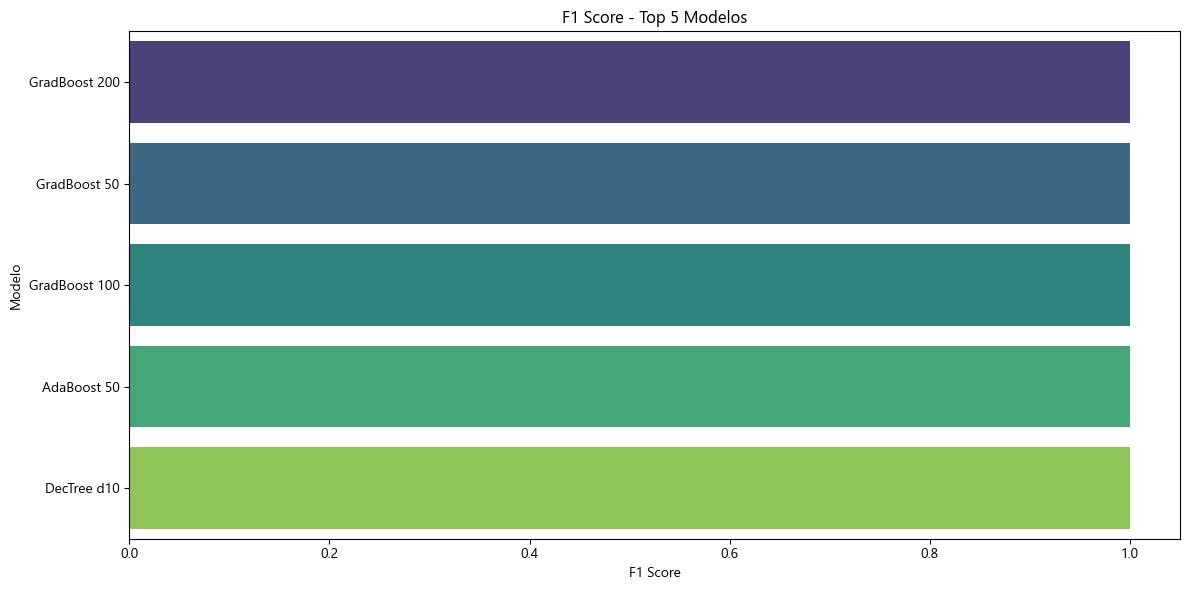

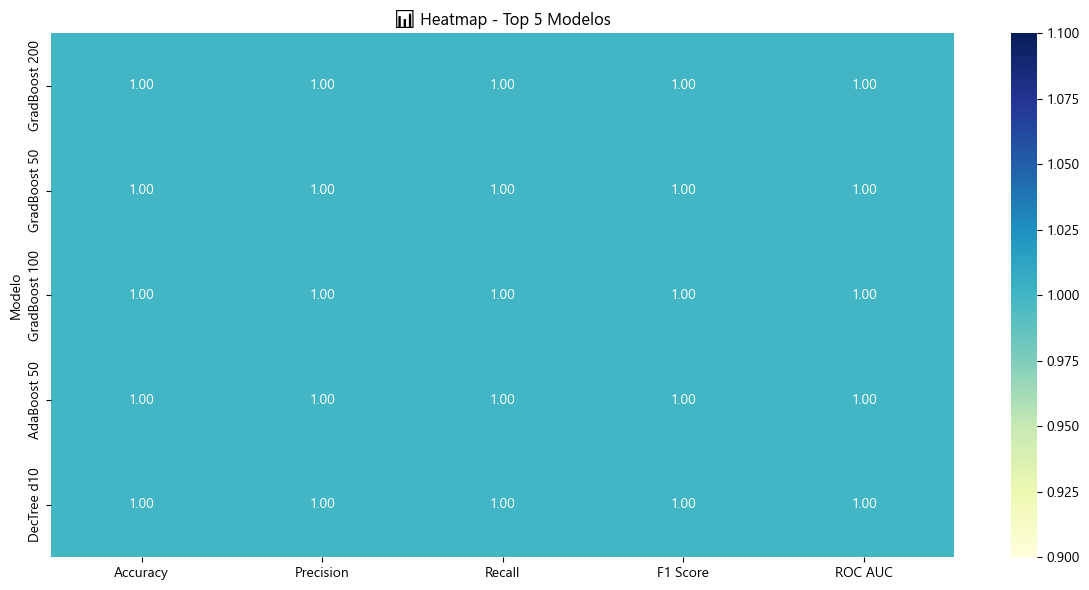

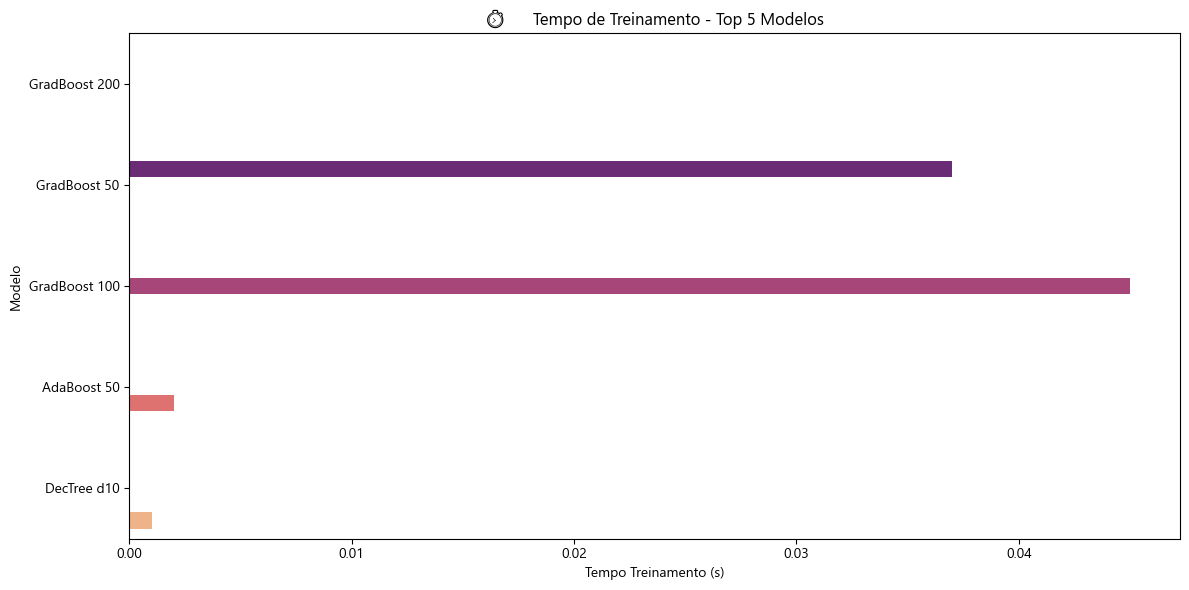

In [164]:
#📊 Visualização dos 5 melhores modelos

# F1 Score dos top 5 modelos
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_resultados, x='F1 Score', y='Modelo', hue='Modelo', palette='viridis', legend=False)
plt.title('F1 Score - Top 5 Modelos')
plt.tight_layout()
plt.show()

# Heatmap dos top 5 modelos
plt.figure(figsize=(12, 6))
sns.heatmap(top5_resultados.drop(columns='Modelo').set_index(top5_resultados['Modelo']).astype(float),annot=True,cmap='YlGnBu',fmt='.2f')
plt.title('📊 Heatmap - Top 5 Modelos')
plt.tight_layout()
plt.show()

# Gráfico de tempo dos top 5 modelos
plt.figure(figsize=(12, 6))
sns.barplot(data=top5_tempos, x='Tempo Treinamento (s)', y='Modelo', hue='Modelo', palette='magma', legend=False)
plt.title('⏱️ Tempo de Treinamento - Top 5 Modelos')
plt.tight_layout()
plt.show()

📑 Apresentação detalhada de métricas preditivas para cada algoritmo

Esta célula imprime, para cada modelo testado:

- A acurácia média da validação cruzada, que fornece uma estimativa mais robusta do desempenho geral, suavizando variações entre divisões dos dados;
- O relatório de classificação (classification_report), que mostra métricas específicas por classe (precisão, recall, f1-score), possibilitando uma avaliação mais granular da performance;
- A matriz de confusão, que evidencia os acertos e erros de classificação por categoria, sendo crucial para entender onde os modelos estão confundindo as culturas agrícolas.

Essa análise detalhada é essencial para identificar não apenas qual modelo tem melhor desempenho geral, mas também quais estão mais equilibrados entre as classes e quais podem estar cometendo erros sistemáticos.

In [165]:
#📑 Apresentação detalhada de métricas preditivas para cada algoritmo

import numpy as np

#📑 Apresentação detalhada de métricas preditivas para cada algoritmo 
for nome in top5_resultados['Modelo']:
    print(f"\n🔍 Avaliando modelo: {nome}")

    # Tenta obter o modelo: da memória ou do disco
    if nome in modelos_treinados:
        modelo = modelos_treinados[nome]
    else:
        try:
            caminho_modelo = f"modelos_salvos/{nome}.pkl"
            modelo = joblib.load(caminho_modelo)
            print(f"📂 Modelo '{nome}' carregado do disco com sucesso.")
        except FileNotFoundError:
            print(f"❌ Modelo '{nome}' não foi treinado nesta execução e também não foi encontrado em disco.")
            continue  # neste caso, não tem como avaliar

    # Tenta obter as previsões
    if nome in y_preds:
        y_pred = y_preds[nome]
    else:
        y_pred = modelo.predict(X_test)
        y_preds[nome] = y_pred  # salva para reutilização, se necessário
        
    # Se y_test ou y_pred estiverem one-hot encoded, converta para labels originais
    if y_test.ndim > 1 and y_test.shape[1] > 1:
        y_test_labels = ohe.inverse_transform(y_test).ravel()
    else:
        y_test_labels = y_test
    
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred_labels = ohe.inverse_transform(y_pred).ravel()
    else:
        y_pred_labels = y_pred

    # Define as classes presentes nos dados atuais
    labels_presentes = np.unique(np.concatenate([y_test_labels, y_pred_labels]))

    # Avaliação
    acc = accuracy_score(y_test_labels, y_pred_labels)
    prec = precision_score(y_test_labels, y_pred_labels, average='weighted', zero_division=0)
    rec = recall_score(y_test_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

    print(f"✅ Acurácia: {acc:.4f}")
    print(f"✅ Precisão: {prec:.4f}")
    print(f"✅ Revocação: {rec:.4f}")
    print(f"✅ F1-Score: {f1:.4f}")

    # Relatório de classificação
    print("\n📄 Relatório de Classificação:")
    print(classification_report(
        y_test_labels, 
        y_pred_labels,
        labels=labels_presentes,
        target_names=[str(c) for c in labels_presentes],
        zero_division=0
    ))




🔍 Avaliando modelo: GradBoost 200
❌ Modelo 'GradBoost 200' não foi treinado nesta execução e também não foi encontrado em disco.

🔍 Avaliando modelo: GradBoost 50
✅ Acurácia: 0.7500
✅ Precisão: 0.8333
✅ Revocação: 0.7500
✅ F1-Score: 0.7333

📄 Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4


🔍 Avaliando modelo: GradBoost 100
✅ Acurácia: 0.7500
✅ Precisão: 0.8333
✅ Revocação: 0.7500
✅ F1-Score: 0.7333

📄 Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0

📈 Visualização da distribuição das classes no conjunto de teste

Por fim, esta célula gera um gráfico de barras mostrando a quantidade de amostras por classe no conjunto de teste. Essa análise ajuda a verificar o balanceamento das classes, fundamental para interpretar corretamente as métricas dos modelos e evitar viés em classificações desbalanceadas.

In [166]:
#📈 Visualização da distribuição das classes no conjunto de teste

pd.DataFrame(le.inverse_transform(y_test)) \
    .value_counts() \
    .reset_index(name='count') \
    .rename(columns={'index': 'label'}) \
    .sort_values(by='count', ascending=False)

NameError: name 'le' is not defined